# Exemplo de estimativa de valores em um ponto no espaço

No exemplo abaixo buscamos estimar o valor de *z*  no ponto (3,3) dentro de um espaço cartesiano variando de 0 a 20 em X e Y. Os vetores x, y e z representam valores observados que usaremos para estimar valores no ponto xi e zi.

In [3]:
from src.IDW import IDW
from src.RBF import RBF
import numpy as np

#### Interpolação usando IDW

In [15]:
x = np.array([1,10,20])
y = np.array([1,10,20])
z = np.array([28,27.5,28.9])

xi = np.array([3])
yi = np.array([3])

estimado = IDW(x,y,z,xi,yi)

print(f'Valor estimado com IDW: {round(estimado[0],1)}')

Valor estimado com IDW: 28.0


#### Interpolação usando RBF

In [16]:
x = np.array([1,10,20])
y = np.array([1,10,20])
z = np.array([26,27.5,28.9])

xi = np.array([3])
yi = np.array([3])

estimado = RBF(x,y,z,xi,yi)

print(f'Valor estimado com RBF: {round(estimado[0],1)}')

Valor estimado com RBF: 26.3


# Exemplo de estimativa de um campo espacial (Grade)

In [3]:
from src.IDW import IDW
from src.RBF import RBF
import numpy as np
import matplotlib.pyplot as plt
from src.utils import coordsTransform, reshape_grid

/tmp/ipykernel_13843/2002820106.py:26: UserWarning: The following kwargs were not used by contour: 'level'
  c = ax.contourf(lon,lat,estimado,level=[25,26,27,28,29,30])


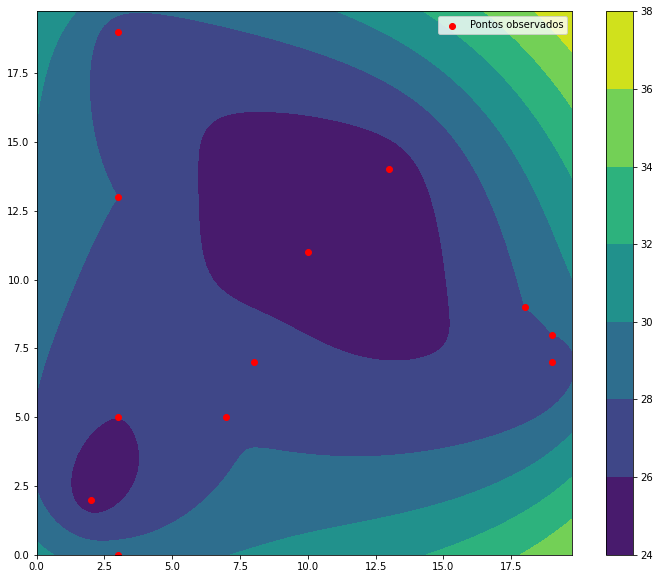

In [38]:
# Valores observados
x = np.random.randint(0,20,12)
y = np.random.randint(0,20,12)
z = np.random.randint(25,30,12)

# Criando duas sequências de X e Y com tamanho N. Essas sequências foram uma grade de tamanho NxN.  
xi = np.arange(0,20,0.25)
yi = np.arange(0,20,0.25)

####################################
# IMPORTANTE #######################
####################################
# Ao criar uma sequência de X e Y, é necessário fazer uma transformação
# nas sequências para gerar todas as combinações de coordenadas possíveis
# para alimentar o modelo de inteporlação
lon, lat = coordsTransform(xi,yi)

# Interpolação de fato. Usando o RBF
z_estimado = RBF(x,y,z,lon,lat)

# Gerando uma grade 2D dos valoes estimados para ser plotado um campo no matplotlib
lon, lat, estimado = reshape_grid(xi,yi,z_estimado)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot()
c = ax.contourf(lon,lat,estimado,level=[25,26,27,28,29,30])
plt.colorbar(c)
ax.scatter(x,y,color='red',label='Pontos observados')
plt.legend()